<a href="https://colab.research.google.com/github/Harsha080996/ML-assignments/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREATING CONVULTION NETWORK FOR CIFAR 10 DATASET**

In [0]:
#importing required headers and libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


**Loading CIFAR-10 data set and dividing the samples into train samples and test samples**

In [0]:
batchsize = 32
total_classes = 10
Epoch = 100
val_loss = list()
val_acc = list()

#loading CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

#Now we need to divide total samples into train and test samples
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#one hot encoding needs to be done to make sure we have 1 for the digit and rest should be 0's in the vector
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)

X_train = list(X_train)
Y_train = list(Y_train)

new_x = np.array(X_train[4*10000:(4+1)*10000])
new_y = np.array(Y_train[4*10000:(4+1)*10000])
  
x_train = np.array(X_train[0:4*10000]+X_train[(4+1)*10000:50000])
y_train = np.array(Y_train[0:4*10000]+Y_train[(4+1)*10000:50000])
  

**Data Augmentation**

In [0]:
def data_augmentation(x,y,new_x):
  #Data Augmentation parameters are listed below
  datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False,  zca_whitening=False, 
  zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.1,height_shift_range=0.1,shear_range=0.,zoom_range=0., channel_shift_range=0.,fill_mode='nearest',
  cval=0., horizontal_flip=True, vertical_flip=False, rescale=None,preprocessing_function=None,data_format=None,validation_split=0.0)
  
  datagen.fit(new_x)
  #The augmented images are trained statically
  for a in range(10):
    num_batches = 0
    for x_batch, y_batch in datagen.flow(x, y, batch_size=40000):
        model.fit(x_batch, y_batch)
        num_batches += 1
        if num_batches >= 1:
            break

**Training on First Architecture**

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])
#Traning augmented images and displaying their loss and accuracy values
data_augmentation(x_train,y_train,x_train)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 26s 641us/step - loss: 1.8945 - acc: 0.2901
Epoch 1/1
40000/40000 [==============================] - 21s 530us/step - loss: 1.5972 - acc: 0.4085
Epoch 1/1
40000/40000 [==============================] - 25s 619us/step - loss: 1.4781 - acc: 0.4586
Epoch 1/1
40000/40000 [==============================] - 21s 528us/step - loss: 1.3909 - acc: 0.4946
Epoch 1/1
40000/40000 [==============================] - 21s 526us/step - loss: 1.3125 - acc: 0.5281
Epoch 1/1
40000/40000 [==============================] - 21s 517us/step - loss: 1.2518 - acc: 0.5532
Epoch 1/1
40000/40000 [==============================] - 23s 581us/step - loss: 1.2049 - acc: 0.5690
Epoch 1/1
40000/40000 [==============================] - 2

**Fitting the training data for first architecture and displaying the loss and accuracy**

In [5]:
history = model.fit(x_train, y_train,batch_size=batchsize,epochs=Epoch,verbose=1,validation_data=(new_x, new_y))
result = model.evaluate(new_x, new_y, verbose=0)
print(result)
print(history.history)
print('loss for validation data is:',history.history['val_loss'][-1])
print('accuracy for validation data is:',history.history['val_acc'][-1])
print('loss for test data:', result[0])
print('accuracy for test data:', result[1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 21s 534us/step - loss: 0.9699 - acc: 0.6564 - val_loss: 0.8813 - val_acc: 0.6926
Epoch 2/100
40000/40000 [==============================] - 21s 527us/step - loss: 0.9308 - acc: 0.6725 - val_loss: 0.8641 - val_acc: 0.7016
Epoch 3/100
40000/40000 [==============================] - 22s 552us/step - loss: 0.8942 - acc: 0.6834 - val_loss: 0.8157 - val_acc: 0.7189
Epoch 4/100
40000/40000 [==============================] - 22s 551us/step - loss: 0.8626 - acc: 0.6958 - val_loss: 0.8028 - val_acc: 0.7215
Epoch 5/100
40000/40000 [==============================] - 22s 553us/step - loss: 0.8325 - acc: 0.7072 - val_loss: 0.7766 - val_acc: 0.7305
Epoch 6/100
40000/40000 [==============================] - 22s 552us/step - loss: 0.8030 - acc: 0.7171 - val_loss: 0.7758 - val_acc: 0.7320
Epoch 7/100
40000/40000 [==============================] - 22s 552us/step - loss: 0.7745 - acc: 0.7281 - val_l

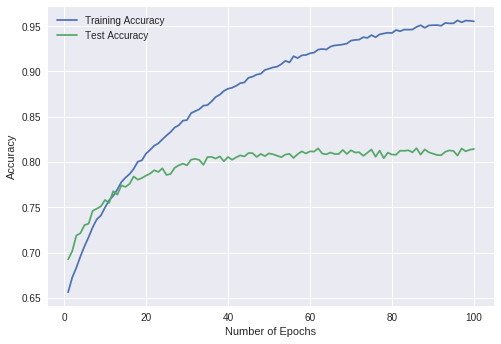

In [6]:
#plotting the accuracy graph for first architecture
plotaccuracy = plt.plot(range(1,Epoch+1),history.history['acc'],range(1,Epoch+1),history.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(plotaccuracy)


**Training on second architecture**

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(total_classes))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
#Traning augmented images and displaying their loss and accuracy values for second architecture
data_augmentation(x_train,y_train,x_train)


Epoch 1/1
40000/40000 [==============================] - 16s 404us/step - loss: 1.8805 - acc: 0.3077
Epoch 1/1
40000/40000 [==============================] - 15s 386us/step - loss: 1.5767 - acc: 0.4250
Epoch 1/1
40000/40000 [==============================] - 17s 417us/step - loss: 1.4772 - acc: 0.4603
Epoch 1/1
40000/40000 [==============================] - 16s 388us/step - loss: 1.3954 - acc: 0.4969
Epoch 1/1
40000/40000 [==============================] - 15s 386us/step - loss: 1.3337 - acc: 0.5183
Epoch 1/1
40000/40000 [==============================] - 15s 384us/step - loss: 1.2817 - acc: 0.5421
Epoch 1/1
40000/40000 [==============================] - 18s 443us/step - loss: 1.2377 - acc: 0.5577
Epoch 1/1
40000/40000 [==============================] - 17s 436us/step - loss: 1.1946 - acc: 0.5739
Epoch 1/1
40000/40000 [==============================] - 17s 433us/step - loss: 1.1566 - acc: 0.5884
Epoch 1/1
40000/40000 [==============================] - 15s 387us/step - loss: 1.1278 - ac

In [8]:
#Fitting the training data for second architecture and displaying the loss and accuracy
history = model.fit(x_train, y_train,batch_size=batchsize,epochs=Epoch,verbose=1,validation_data=(new_x, new_y))
result = model.evaluate(new_x, new_y, verbose=0)
print(result)
print(history.history)
print('loss for validation data is:',history.history['val_loss'][-1])
print('accuracy for validation data is:',history.history['val_acc'][-1])
print('loss for test data:', result[0])
print('accuracy for test data:', result[1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 16s 412us/step - loss: 0.9952 - acc: 0.6495 - val_loss: 0.9178 - val_acc: 0.6810
Epoch 2/100
40000/40000 [==============================] - 16s 411us/step - loss: 0.9554 - acc: 0.6644 - val_loss: 0.8718 - val_acc: 0.6992
Epoch 3/100
40000/40000 [==============================] - 16s 409us/step - loss: 0.9176 - acc: 0.6784 - val_loss: 0.8430 - val_acc: 0.7109
Epoch 4/100
40000/40000 [==============================] - 16s 409us/step - loss: 0.8868 - acc: 0.6895 - val_loss: 0.8193 - val_acc: 0.7183
Epoch 5/100
40000/40000 [==============================] - 16s 409us/step - loss: 0.8554 - acc: 0.7010 - val_loss: 0.8038 - val_acc: 0.7250
Epoch 6/100
40000/40000 [==============================] - 16s 407us/step - loss: 0.8247 - acc: 0.7105 - val_loss: 0.7836 - val_acc: 0.7350
Epoch 7/100
40000/40000 [==============================] - 16s 409us/step - loss: 0.7970 - acc: 0.7217 - val_l

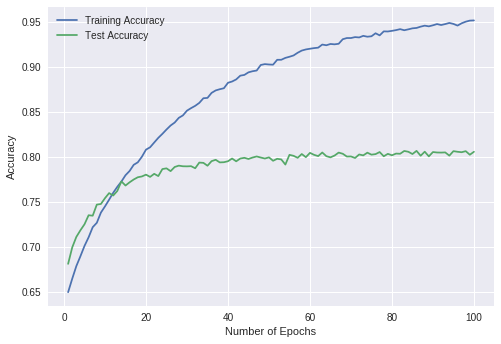

In [9]:
#plotting the accuracy graph for second architecture
plotaccuracy = plt.plot(range(1,Epoch+1),history.history['acc'],range(1,Epoch+1),history.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(plotaccuracy)


**Training on third architecture**


In [11]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(AveragePooling2D())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
#Traning augmented images and displaying their loss and accuracy values for third architecture
data_augmentation(x_train,y_train,x_train)


Epoch 1/1
40000/40000 [==============================] - 12s 291us/step - loss: 1.9167 - acc: 0.2980
Epoch 1/1
40000/40000 [==============================] - 11s 271us/step - loss: 1.6529 - acc: 0.4032
Epoch 1/1
40000/40000 [==============================] - 12s 294us/step - loss: 1.5492 - acc: 0.4369
Epoch 1/1
40000/40000 [==============================] - 11s 271us/step - loss: 1.4922 - acc: 0.4584
Epoch 1/1
40000/40000 [==============================] - 11s 270us/step - loss: 1.4498 - acc: 0.4758
Epoch 1/1
40000/40000 [==============================] - 11s 269us/step - loss: 1.4164 - acc: 0.4881
Epoch 1/1
40000/40000 [==============================] - 12s 293us/step - loss: 1.3889 - acc: 0.5012
Epoch 1/1
40000/40000 [==============================] - 12s 293us/step - loss: 1.3602 - acc: 0.5118
Epoch 1/1
40000/40000 [==============================] - 12s 294us/step - loss: 1.3329 - acc: 0.5240
Epoch 1/1
40000/40000 [==============================] - 11s 270us/step - loss: 1.3098 - ac

In [12]:
#Fitting the training data for third architecture and displaying the loss and accuracy
history = model.fit(x_train, y_train,batch_size=batchsize,epochs=Epoch,verbose=1,validation_data=(new_x, new_y))
result = model.evaluate(new_x, new_y, verbose=0)
print(result)
print(history.history)
print('loss for validation data is:',history.history['val_loss'][-1])
print('accuracy for validation data is:',history.history['val_acc'][-1])
print('loss for test data:', result[0])
print('accuracy for test data:', result[1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 12s 295us/step - loss: 1.1921 - acc: 0.5770 - val_loss: 1.1966 - val_acc: 0.5779
Epoch 2/100
40000/40000 [==============================] - 12s 292us/step - loss: 1.1590 - acc: 0.5895 - val_loss: 1.1646 - val_acc: 0.5925
Epoch 3/100
40000/40000 [==============================] - 12s 294us/step - loss: 1.1292 - acc: 0.6006 - val_loss: 1.1538 - val_acc: 0.5914
Epoch 4/100
40000/40000 [==============================] - 12s 296us/step - loss: 1.1042 - acc: 0.6104 - val_loss: 1.1886 - val_acc: 0.5892
Epoch 5/100
40000/40000 [==============================] - 13s 317us/step - loss: 1.0809 - acc: 0.6175 - val_loss: 1.1230 - val_acc: 0.6056
Epoch 6/100
40000/40000 [==============================] - 13s 319us/step - loss: 1.0590 - acc: 0.6281 - val_loss: 1.1335 - val_acc: 0.6065
Epoch 7/100
40000/40000 [==============================] - 12s 295us/step - loss: 1.0397 - acc: 0.6336 - val_l

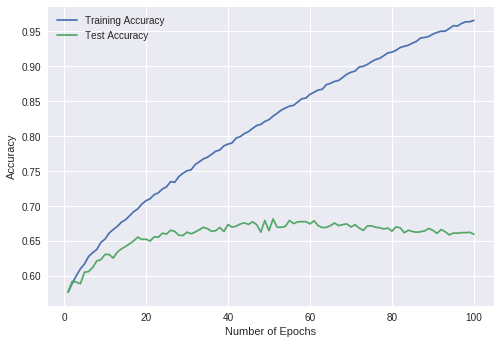

In [13]:
#plotting the accuracy graph for third architecture
plotaccuracy = plt.plot(range(1,Epoch+1),history.history['acc'],range(1,Epoch+1),history.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(plotaccuracy)


**Training on fourth architecture**

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(total_classes))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
#Traning augmented images and displaying their loss and accuracy values for fourth architecture
data_augmentation(x_train,y_train,x_train)


Epoch 1/1
40000/40000 [==============================] - 18s 455us/step - loss: 1.9655 - acc: 0.2534
Epoch 1/1
40000/40000 [==============================] - 17s 435us/step - loss: 1.6963 - acc: 0.3693
Epoch 1/1
40000/40000 [==============================] - 19s 482us/step - loss: 1.5811 - acc: 0.4166
Epoch 1/1
40000/40000 [==============================] - 17s 433us/step - loss: 1.4964 - acc: 0.4504
Epoch 1/1
40000/40000 [==============================] - 17s 436us/step - loss: 1.4236 - acc: 0.4810
Epoch 1/1
40000/40000 [==============================] - 17s 434us/step - loss: 1.3591 - acc: 0.5090
Epoch 1/1
40000/40000 [==============================] - 18s 456us/step - loss: 1.3136 - acc: 0.5260
Epoch 1/1
40000/40000 [==============================] - 19s 477us/step - loss: 1.2722 - acc: 0.5423
Epoch 1/1
40000/40000 [==============================] - 19s 479us/step - loss: 1.2264 - acc: 0.5597
Epoch 1/1
40000/40000 [==============================] - 17s 432us/step - loss: 1.1951 - ac

In [16]:
#Fitting the training data for fourth architecture and displaying the loss and accuracy
history = model.fit(x_train, y_train,batch_size=batchsize,epochs=Epoch,verbose=1,validation_data=(new_x, new_y))
result = model.evaluate(new_x, new_y, verbose=0)
print(result)
print(history.history)
print('loss for validation data is:',history.history['val_loss'][-1])
print('accuracy for validation data is:',history.history['val_acc'][-1])
print('loss for test data:', result[0])
print('accuracy for test data:', result[1])


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 19s 474us/step - loss: 1.0741 - acc: 0.6159 - val_loss: 1.0328 - val_acc: 0.6393
Epoch 2/100
40000/40000 [==============================] - 18s 461us/step - loss: 1.0433 - acc: 0.6271 - val_loss: 0.9493 - val_acc: 0.6610
Epoch 3/100
40000/40000 [==============================] - 19s 464us/step - loss: 1.0148 - acc: 0.6391 - val_loss: 0.9439 - val_acc: 0.6627
Epoch 4/100
40000/40000 [==============================] - 19s 466us/step - loss: 0.9887 - acc: 0.6502 - val_loss: 0.8921 - val_acc: 0.6908
Epoch 5/100
40000/40000 [==============================] - 19s 467us/step - loss: 0.9572 - acc: 0.6605 - val_loss: 0.8785 - val_acc: 0.6911
Epoch 6/100
40000/40000 [==============================] - 19s 465us/step - loss: 0.9382 - acc: 0.6689 - val_loss: 0.8488 - val_acc: 0.7016
Epoch 7/100
40000/40000 [==============================] - 19s 464us/step - loss: 0.9146 - acc: 0.6747 - val_l

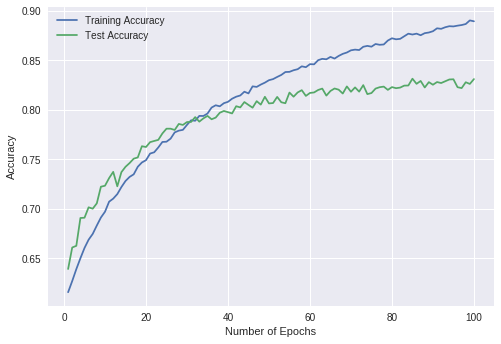

In [17]:
#plotting the accuracy graph for fourth architecture
plotaccuracy = plt.plot(range(1,Epoch+1),history.history['acc'],range(1,Epoch+1),history.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(plotaccuracy)


**The best architecture among all is architecture four. Training fourth architecture on data from training set and validation set and evaluationg its performance on test set**



In [23]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
Y_train = keras.utils.to_categorical(Y_train, total_classes)
Y_test = keras.utils.to_categorical(Y_test, total_classes)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(total_classes))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
#Traning augmented images and displaying their loss and accuracy values for fourth architecture by training fourth architecture on data from training set and validation set and evaluationg its performance on test set
data_augmentation(X_train,Y_train,X_train)


Epoch 1/1
40000/40000 [==============================] - 19s 475us/step - loss: 1.9742 - acc: 0.2477
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.6902 - acc: 0.3665
Epoch 1/1
40000/40000 [==============================] - 17s 434us/step - loss: 1.5665 - acc: 0.4192
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 1.4881 - acc: 0.4485
Epoch 1/1
40000/40000 [==============================] - 18s 441us/step - loss: 1.4284 - acc: 0.4772
Epoch 1/1
40000/40000 [==============================] - 17s 434us/step - loss: 1.3720 - acc: 0.4981
Epoch 1/1
40000/40000 [==============================] - 18s 439us/step - loss: 1.3263 - acc: 0.5197
Epoch 1/1
40000/40000 [==============================] - 18s 438us/step - loss: 1.2808 - acc: 0.5382
Epoch 1/1
40000/40000 [==============================] - 17s 433us/step - loss: 1.2467 - acc: 0.5467
Epoch 1/1
40000/40000 [==============================] - 17s 435us/step - loss: 1.2115 - ac

In [24]:
#Fitting the training data for fourth architecture and displaying the loss and accuracy by training fourth architecture on data from training set and validation set and evaluationg its performance on test set

history = model.fit(X_train, Y_train,batch_size=batchsize,epochs=Epoch,verbose=1,validation_data=(X_test, Y_test))
result = model.evaluate(X_test, Y_test, verbose=0)
print(result)
print(history.history)
print('loss for validation data is:',history.history['val_loss'][-1])
print('accuracy for validation data is:',history.history['val_acc'][-1])
print('loss for test data:', result[0])
print('accuracy for test data:', result[1])


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 488us/step - loss: 1.0968 - acc: 0.6096 - val_loss: 1.1263 - val_acc: 0.6051
Epoch 2/100
50000/50000 [==============================] - 24s 472us/step - loss: 1.0520 - acc: 0.6260 - val_loss: 0.9568 - val_acc: 0.6591
Epoch 3/100
50000/50000 [==============================] - 24s 471us/step - loss: 1.0191 - acc: 0.6383 - val_loss: 0.9399 - val_acc: 0.6623
Epoch 4/100
50000/50000 [==============================] - 24s 472us/step - loss: 0.9841 - acc: 0.6491 - val_loss: 0.9029 - val_acc: 0.6779
Epoch 5/100
50000/50000 [==============================] - 24s 471us/step - loss: 0.9563 - acc: 0.6619 - val_loss: 0.9022 - val_acc: 0.6816
Epoch 6/100
50000/50000 [==============================] - 23s 470us/step - loss: 0.9254 - acc: 0.6700 - val_loss: 0.8624 - val_acc: 0.6930
Epoch 7/100
50000/50000 [==============================] - 23s 466us/step - loss: 0.9021 - acc: 0.6820 - val_l

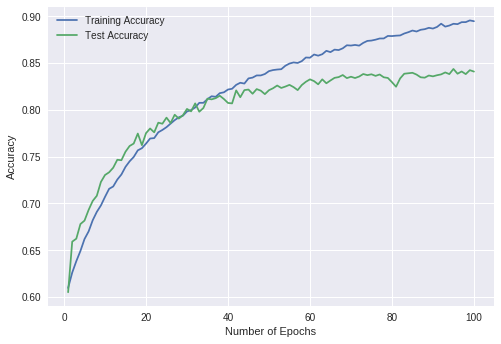

In [25]:
#plotting the accuracy graph
plotaccuracy = plt.plot(range(1,Epoch+1),history.history['acc'],range(1,Epoch+1),history.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

**Re-evaluating fourth architecture using k-fold validation with k=5**

In [0]:
def loss():
  loss_avg = 0
  acc_avg = 0
  for i in range(5):
    loss_avg += val_loss[i]/5
    acc_avg += val_acc[i]/5
  
  print(' avg of validation loss:',loss_avg)
  print(' avg of validation accuracy:',acc_avg)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
k-fold Validation for k = 1
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 23s 584us/step - loss: 1.9755 - acc: 0.2505
Epoch 1/1
40000/40000 [==============================] - 19s 472us/step - loss: 1.6792 - acc: 0.3741
Epoch 1/1
40000/40000 [==============================] - 20s 506us/step - loss: 1.5533 - acc: 0.4253
Epoch 1/1
40000/40000 [==============================] - 18s 449us/step - loss: 1.4629 - acc: 0.4641
Epoch 1/1
40000/40000 [==============================] - 21s 515us/step - loss: 1.3943 - acc: 0.4910
Epoch 1/1
40000/40000 [==============================] - 18s 459us/step - loss: 1.3433 - acc: 0.5150
Epoch 1/1
40000/40000 [==============================] - 19s 468us/step - loss: 1.2945 - acc: 0.5350
Epoch 1/1
40000/40000 [=======

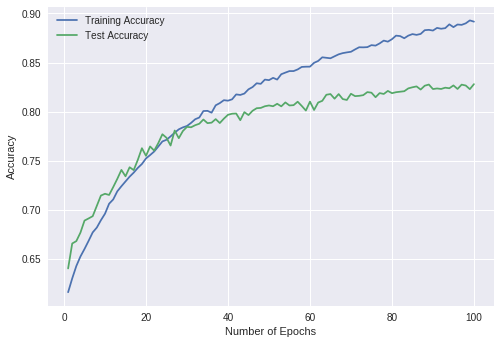

k-fold Validation for k = 2
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 0.6661 - acc: 0.7718
Epoch 1/1
40000/40000 [==============================] - 20s 503us/step - loss: 0.6464 - acc: 0.7784
Epoch 1/1
40000/40000 [==============================] - 20s 490us/step - loss: 0.6345 - acc: 0.7796
Epoch 1/1
40000/40000 [==============================] - 18s 454us/step - loss: 0.6267 - acc: 0.7822
Epoch 1/1
40000/40000 [==============================] - 18s 456us/step - loss: 0.6175 - acc: 0.7858
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 0.6137 - acc: 0.7860
Epoch 1/1
40000/40000 [==============================] - 20s 490us/step - loss: 0.6073 - acc: 0.7886
Epoch 1/1
40000/40000 [==============================] - 20s 489us/step - loss: 0.5940 - acc: 0.7926
Epoch 1/1
40000/40000 [==============================] - 19s 485us/step - loss: 0.6006 - acc: 0.7893
Epoch 1/1
40000/40000 [==============================] - 18s 45

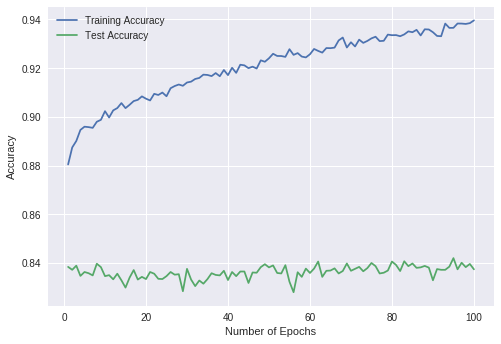

k-fold Validation for k = 3
Epoch 1/1
40000/40000 [==============================] - 17s 422us/step - loss: 0.6226 - acc: 0.7923
Epoch 1/1
40000/40000 [==============================] - 18s 443us/step - loss: 0.5903 - acc: 0.8011
Epoch 1/1
40000/40000 [==============================] - 20s 495us/step - loss: 0.5847 - acc: 0.8001
Epoch 1/1
40000/40000 [==============================] - 17s 423us/step - loss: 0.5727 - acc: 0.8024
Epoch 1/1
40000/40000 [==============================] - 17s 424us/step - loss: 0.5637 - acc: 0.8058
Epoch 1/1
40000/40000 [==============================] - 17s 426us/step - loss: 0.5600 - acc: 0.8070
Epoch 1/1
40000/40000 [==============================] - 18s 458us/step - loss: 0.5500 - acc: 0.8096
Epoch 1/1
40000/40000 [==============================] - 18s 450us/step - loss: 0.5478 - acc: 0.8099
Epoch 1/1
40000/40000 [==============================] - 18s 457us/step - loss: 0.5406 - acc: 0.8115
Epoch 1/1
40000/40000 [==============================] - 17s 42

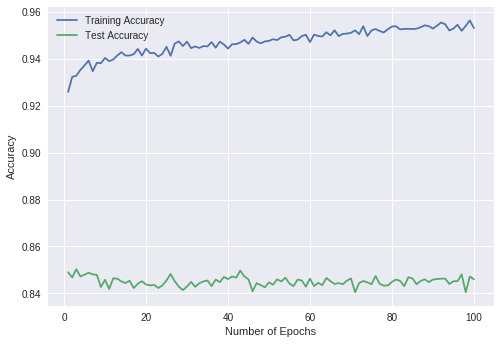

k-fold Validation for k = 4
Epoch 1/1
40000/40000 [==============================] - 17s 430us/step - loss: 0.6148 - acc: 0.7986
Epoch 1/1
40000/40000 [==============================] - 20s 506us/step - loss: 0.5727 - acc: 0.8076
Epoch 1/1
40000/40000 [==============================] - 19s 485us/step - loss: 0.5595 - acc: 0.8086
Epoch 1/1
40000/40000 [==============================] - 17s 427us/step - loss: 0.5491 - acc: 0.8116
Epoch 1/1
40000/40000 [==============================] - 17s 427us/step - loss: 0.5420 - acc: 0.8155
Epoch 1/1
40000/40000 [==============================] - 17s 426us/step - loss: 0.5303 - acc: 0.8196
Epoch 1/1
40000/40000 [==============================] - 18s 462us/step - loss: 0.5340 - acc: 0.8173
Epoch 1/1
40000/40000 [==============================] - 19s 463us/step - loss: 0.5242 - acc: 0.8205
Epoch 1/1
40000/40000 [==============================] - 18s 455us/step - loss: 0.5202 - acc: 0.8236
Epoch 1/1
40000/40000 [==============================] - 17s 43

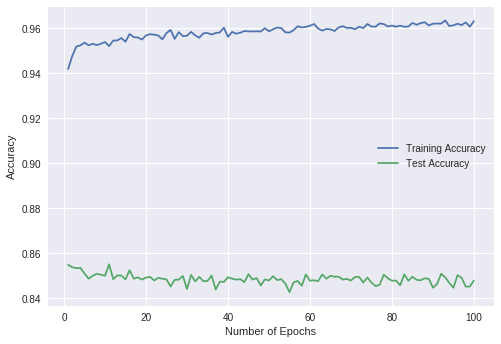

k-fold Validation for k = 5
Epoch 1/1
40000/40000 [==============================] - 17s 425us/step - loss: 0.6021 - acc: 0.8043
Epoch 1/1
40000/40000 [==============================] - 18s 462us/step - loss: 0.5514 - acc: 0.8150
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 0.5460 - acc: 0.8179
Epoch 1/1
40000/40000 [==============================] - 17s 421us/step - loss: 0.5292 - acc: 0.8217
Epoch 1/1
40000/40000 [==============================] - 17s 421us/step - loss: 0.5263 - acc: 0.8219
Epoch 1/1
40000/40000 [==============================] - 17s 419us/step - loss: 0.5204 - acc: 0.8243
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 0.5216 - acc: 0.8236
Epoch 1/1
40000/40000 [==============================] - 18s 446us/step - loss: 0.5151 - acc: 0.8215
Epoch 1/1
40000/40000 [==============================] - 19s 469us/step - loss: 0.5062 - acc: 0.8293
Epoch 1/1
40000/40000 [==============================] - 18s 44

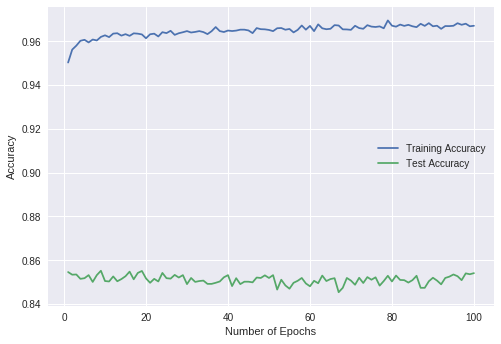

IndexError: ignored

In [9]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(Y_train, total_classes)
Y_test = np_utils.to_categorical(Y_test, total_classes)
X_train = list(X_train)
Y_train = list(Y_train)
k = 1
for i in range(5):
  new_x = np.array(X_train[i*10000:(i+1)*10000])
  new_y = np.array(Y_train[i*10000:(i+1)*10000])
  x_train = np.array(X_train[0:i*10000]+X_train[(i+1)*10000:50000])
  y_train = np.array(Y_train[0:i*10000]+Y_train[(i+1)*10000:50000])
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (2, 2), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (2, 2)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(total_classes))
  model.add(Activation('softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
  while(k<6):
    print("k-fold Validation for k =", k)
    k+=1
    #Traning augmented images and displaying their loss and accuracy values for k-fold cross validation with k=5
    data_augmentation(x_train, y_train, x_train)
    #Fitting the training data for above architecture which uses k-fold cross validation and displaying the loss and accuracy
    history = model.fit(x_train, y_train,batch_size=batchsize,epochs=Epoch,verbose=1,validation_data=(new_x, new_y))
    result = model.evaluate(new_x, new_y, verbose=0)
    print(result)
    print(history.history)
    print('avg. loss for validation data is:',history.history['val_loss'][-1])
    print('avg. accuracy for validation data is:',history.history['val_acc'][-1])
    print('loss for test data:', result[0])
    print('accuracy for test data:', result[1])
    #plotting the accuracy graph
    plotaccuracy = plt.plot(range(1,Epoch+1),history.history['acc'],range(1,Epoch+1),history.history['val_acc'])
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(('Training Accuracy','Test Accuracy'))
    plt.show(plotaccuracy)

loss()


The list index out of range is not part of actual code, i could fix that and run again but it is takes 4 hours of execution so i am leaving it as it is.